In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define paths
video_path = r'C:\Users\RINNY\Downloads\edmonton_canada (1).mp4'
prototxt_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.prototxt.txt'
model_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.caffemodel'

# Set minimum confidence and class labels
min_confidence = 0.2  # Set to a value between 0 and 1
classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 
           'dog', 'horse', 'motorbike', 'person', 'sheep', 'sofa', 'train', 'tvmonitor']

# Generate random colors for the classes
np.random.seed(543210)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Load the pre-trained model
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Use video file or webcam
# cap = cv2.VideoCapture(0)  # Uncomment for webcam
cap = cv2.VideoCapture(video_path)  # Uncomment for video file

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, image = cap.read()  # Read a frame from the video capture
    if not ret:
        print("Error: Could not read frame.")
        break
    
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # Set the blob as input to the network
    net.setInput(blob)

    # Perform forward pass to get the detected objects
    detected_objects = net.forward()

    # Iterate over the detections
    for i in range(detected_objects.shape[2]):
        confidence = detected_objects[0, 0, i, 2]
        
        if confidence > min_confidence:
            class_index = int(detected_objects[0, 0, i, 1])
            
            # Get the bounding box coordinates
            upper_left_x = int(detected_objects[0, 0, i, 3] * width)
            upper_left_y = int(detected_objects[0, 0, i, 4] * height)
            lower_right_x = int(detected_objects[0, 0, i, 5] * width)
            lower_right_y = int(detected_objects[0, 0, i, 6] * height)
            
            # Prepare the label text with the class name and confidence
            prediction_text = f"{classes[class_index]}: {confidence:.2f}"
            
            # Draw a bounding box around the detected object
            cv2.rectangle(image, (upper_left_x, upper_left_y), (lower_right_x, lower_right_y), colors[class_index], 3)
            
            # Correct the text placement logic
            y_position = upper_left_y - 15 if upper_left_y > 30 else upper_left_y + 15
            
            # Draw the prediction text
            cv2.putText(image, prediction_text, (upper_left_x, y_position), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[class_index], 2)

    cv2.imshow("Detected Image", image)
    
    if cv2.waitKey(5) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cv2.destroyAllWindows()
cap.release()


Error: Could not read frame.


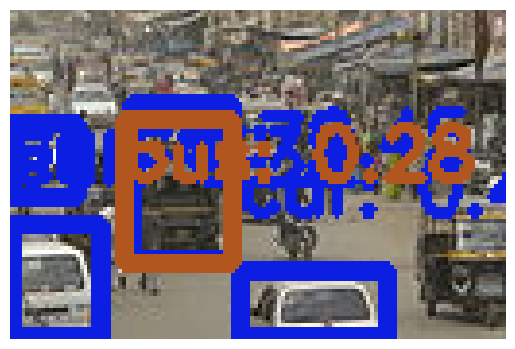

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define paths
image_path = r'C:\Users\RINNY\Downloads\128px-Road_traffic_in_Gwalior.jpg'
prototxt_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.prototxt.txt'
model_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.caffemodel'

# Set minimum confidence and class labels
min_confidence = 0.2  # Set to a value between 0 and 1
classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 
           'dog', 'horse', 'motorbike', 'person', 'sheep', 'sofa', 'train', 'tvmonitor']

# Generate random colors for the classes
np.random.seed(543210)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Load the pre-trained model
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Load and preprocess the image
image = cv2.imread(image_path)
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# Set the blob as input to the network
net.setInput(blob)

# Perform forward pass to get the detected objects
detected_objects = net.forward()

# Iterate over the detections
for i in range(detected_objects.shape[2]):
    confidence = detected_objects[0, 0, i, 2]
    
    if confidence > min_confidence:
        class_index = int(detected_objects[0, 0, i, 1])
        
        # Get the bounding box coordinates
        upper_left_x = int(detected_objects[0, 0, i, 3] * width)
        upper_left_y = int(detected_objects[0, 0, i, 4] * height)
        lower_right_x = int(detected_objects[0, 0, i, 5] * width)
        lower_right_y = int(detected_objects[0, 0, i, 6] * height)
        
        # Prepare the label text with the class name and confidence
        prediction_text = f"{classes[class_index]}: {confidence:.2f}"
        
        # Draw a bounding box around the detected object
        cv2.rectangle(image, (upper_left_x, upper_left_y), (lower_right_x, lower_right_y), colors[class_index], 3)
        
        # Correct the text placement logic
        y_position = upper_left_y - 15 if upper_left_y > 30 else upper_left_y + 15
        
        # Draw the prediction text
        cv2.putText(image, prediction_text, (upper_left_x, y_position), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[class_index], 2)

# Convert the image from BGR (OpenCV default) to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()
